### NAMA : ADI HERIANTO RAJAGUKGUK
### RAKAMIN STUDENT BATCH 22
### MINI PROJECT 4 : Customer Clicked Ads Classification by Using Machine Learning

Predict Customer Clicked Ads Classification by Using Machine Learning Sebuah perusahaan di Indonesia ingin mengetahui efektifitas sebuah iklan yang mereka tayangkan, hal ini penting bagi perusahaan yang bergerak di bidang consultant digital marketing agar dapat mengetahui seberapa besar ketercapainnya iklan yang dipasarkan sehingga dapat menarik customers untuk melihat iklan. Pada mini project kali ini, kamu ditugaskan sebagai anggota pada tim data perusahaan tersebut. Anda bertanggung jawab untuk mencari insight terkait perilaku user dari data tersebut dengan membuatkan visualisasinya, membuat sebuah machine learning yang relevan dengan kebutuhan perusahaan, serta membuat rekomendasi dari hasil penemuan-penemuan yang didapat.

## LOAD DATASET

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# sklearn import for data pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# sklearn import for LogisticRegression and RandomForest algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ignore warnings( not suggested for real-life projects)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/MINI PROJECT 4/Clicked Ads Dataset.csv')
df.head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


#1. TASK 1 - EXPLORATORY DATA ANALYSIS

##a. Deskriptif Statistik

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


Pengamatan :     
- Data terdiri dari 1000 baris/rows dan 10 kolom utama (unnamed, excluding)
- Tipe data Time stamp lebih baik dalam bentuk 'Date time'
- Clicked on Ad akan dibuat menjadi binary number, 0 dan 1 dengan feature encoding ataupun replace 

In [ ]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


DATA UNDERSTANDING:
1. Daily Time Spent on Site ----> waktu yang dihabiskan untuk berselancar di website      
2. Age ----> Umur Customer
3. Area Income ----> Pendapatan
4. Daily Internet usage --->Pengunaan internet sehari2
5. Male ----> Jenis kelamin
6. Timestamp ----> Tanggal/waktu
7. Clicked on A ----> ya atau tidak?
8. City ----> Kota
9. Province ----> Provinsi
10. Category ----> Categori (eg : Furniture, Food, Electronic etc.)

#### pengelompokan kolom berdasarkan jenisnya

In [ ]:
nums = ['Daily Time Spent on Site','Age', 'Area Income',  'Clicked on Ad', 'Daily Internet Usage']
cats = ['Male', 'city', 'province', 'category']

#### A. Data Numerical

In [ ]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


#### B. Data Categorical

In [ ]:
df[cats].describe().transpose()

,count,unique,top,freq
Male,997,2,Perempuan,518
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


Value Counting

In [ ]:
for col in cats:
    print(f"Value count column {col}:")
    print(df[col].value_counts())
    print()

Value count column Male:
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Value count column city:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64

Value count column province:
Daerah Khusus Ibukota Jakarta    253
Jawa Barat                       210
Jawa Timur                        90
Bant

## Univariate Analysis

In [ ]:
df_1 = df.copy()

In [ ]:
# Mapping Gender
mapping_clicked = {
    'No' : 0,
    'Yes' : 1
}
df_1['Clicked on Ad'] = df_1['Clicked on Ad'].map(mapping_clicked)

In [ ]:
df_1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,0,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,0,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,0,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,0,Medan,Sumatra Utara,Finance


#### Boxplot

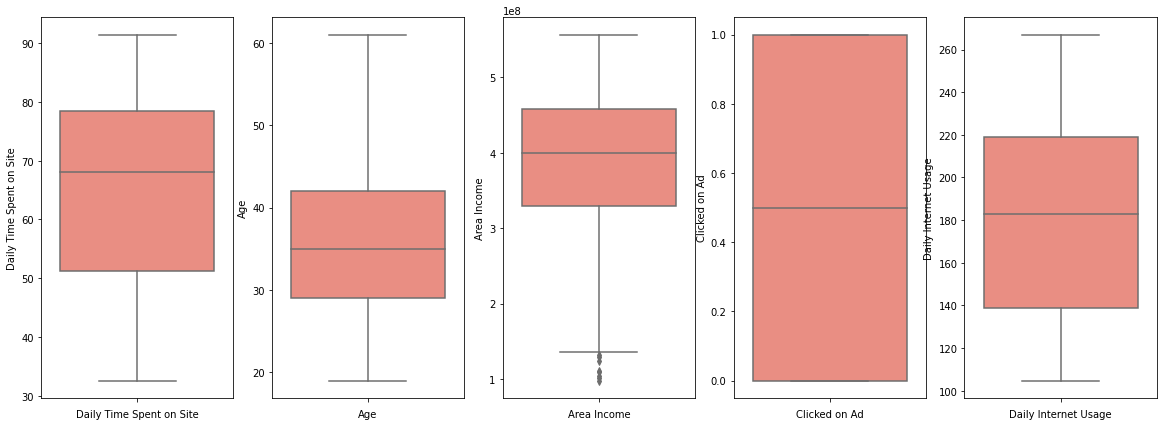

In [ ]:
plt.figure(figsize=(20,7))
features = nums
for i in range(0, len(features)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_1[features[i]], color='salmon', orient='v')
    plt.xlabel(features[i])

Distribusi data sudah sangat baik. Walaupun masih ada outlier pada fitur `Area Income`, tetapi outlier tersebut tidak terlalu mengganggu dan masih bisa ditoleransi. 

#### Displot

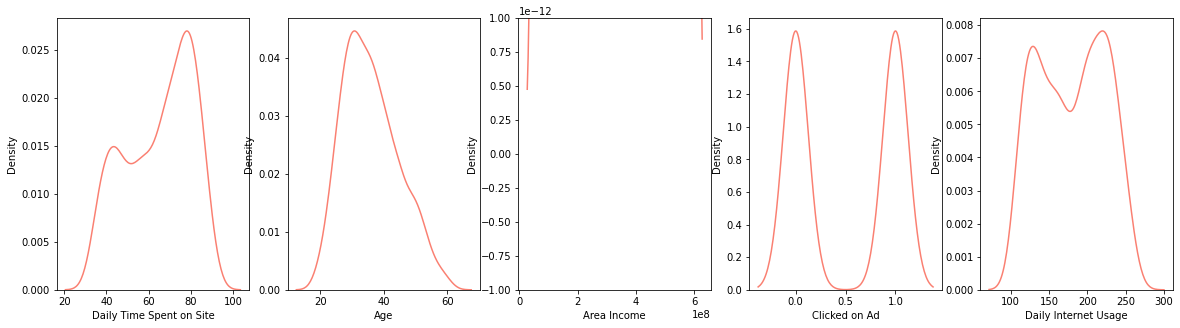

In [ ]:
features = nums
plt.figure(figsize=(20, 5))
for i in range(0, len(features)):
    plt.subplot(1, 5, i+1)
    sns.kdeplot(x=df_1[features[i]], color='salmon')
    plt.xlabel(features[i])

#### Count Plot (Categorical)

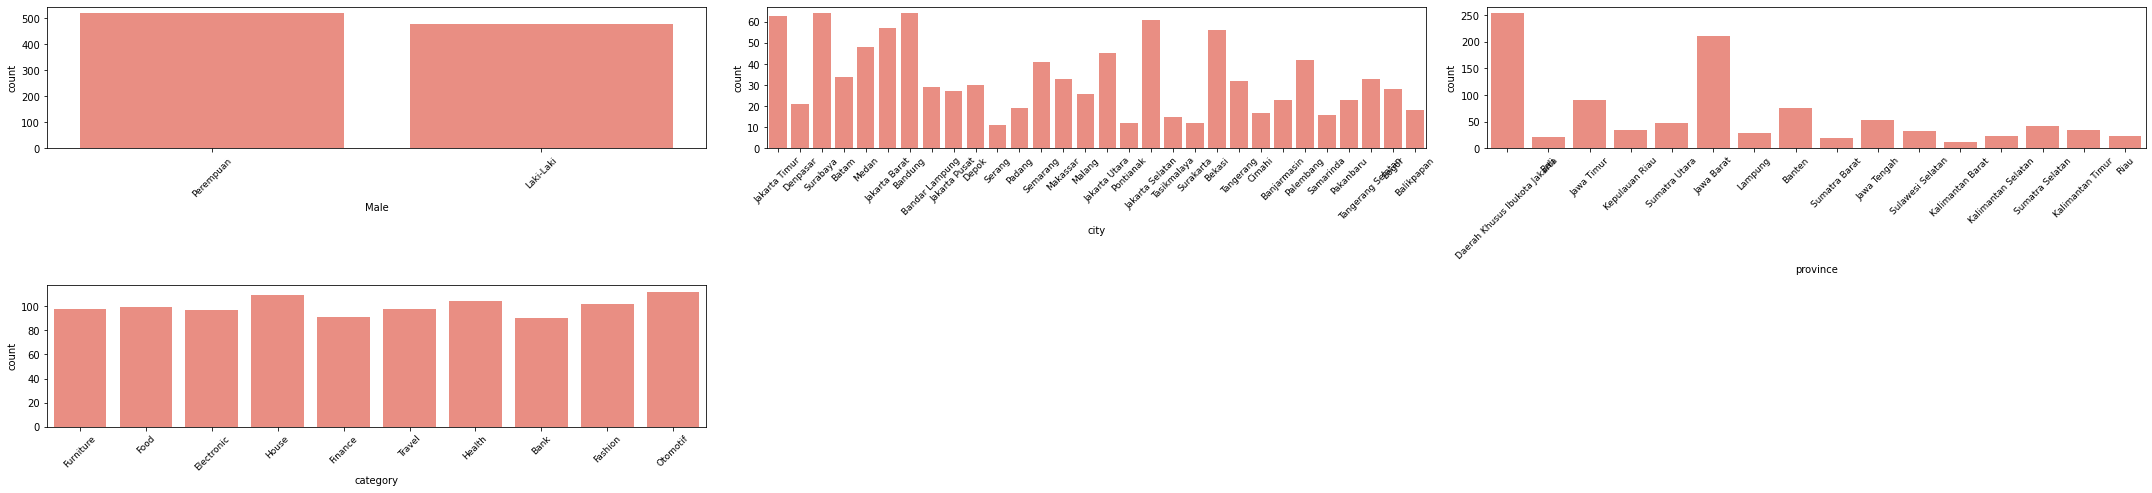

In [ ]:
plt.figure(figsize=(30,10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df_1[cats[i]], color='salmon', orient='v')
    plt.xticks(fontsize=9, rotation=45)
    plt.tight_layout()

## Bivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

#### Correlation Maps

In [ ]:
df_1.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331424,0.308266,0.518294,-0.746514
Age,-0.331424,1.000000,-0.179343,-0.370481,0.492531
Area Income,0.308266,-0.179343,1.000000,0.338080,-0.477576
Daily Internet Usage,0.518294,-0.370481,0.338080,1.000000,-0.789693
Clicked on Ad,-0.746514,0.492531,-0.477576,-0.789693,1.000000


Text(0.5, 1.0, 'Korelasi')

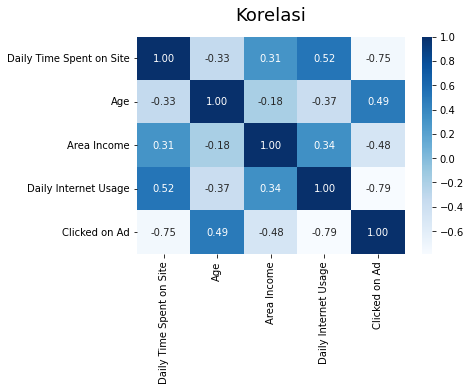

In [ ]:
heatmaps=sns.heatmap(df_1.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

Dari korelasi di atas, diperoleh beberapa pengamatan :     
- Semua fitur memiliki korelasi terhadap Target--> Target adalah Click on Ad. 
- `Daily Time Spent On Site`, `Area Income`, `Daily Internet Usage` berkorelasi negatif dengan target
- `Age` berkorelasi positif dengan target
- Fitur antar fitur lain (selainn thd target) yang berkorelasi kuat (corr >=0.4) : `Daily Time Spent on Site` dengan `Daily Internet Usage`. 

###  Multivariate Analysis

#### Pair Plot

<Figure size 1080x1080 with 0 Axes>

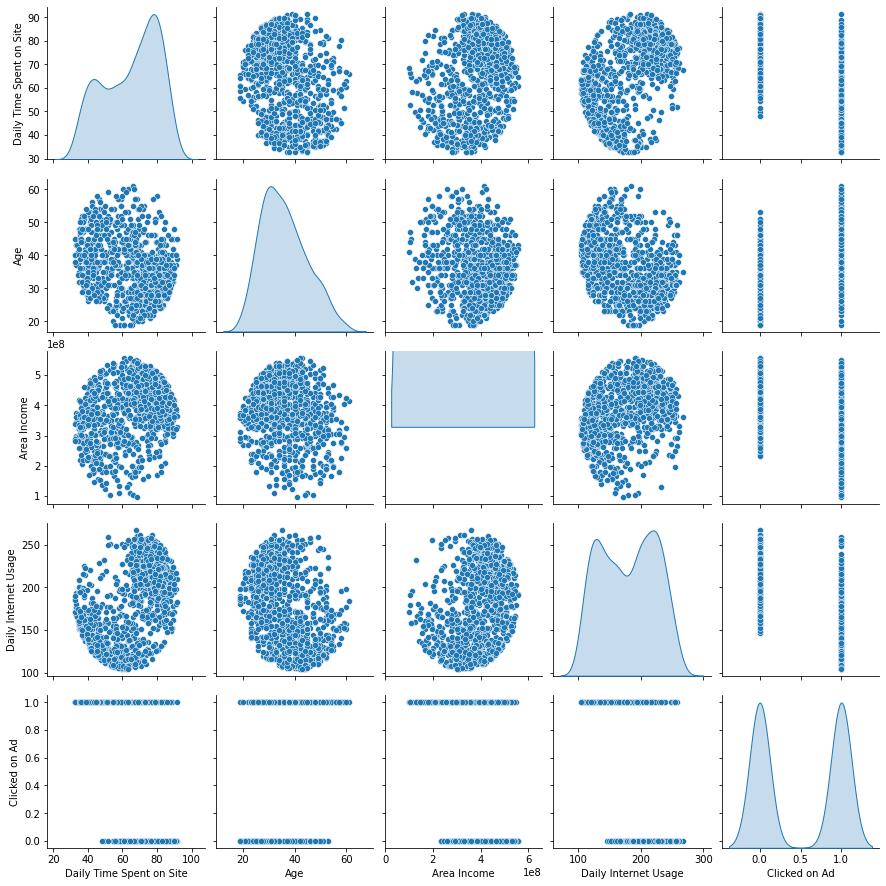

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_1, diag_kind='kde')

# TASK 2 - DATA CLEANING AND PREPROCESSING

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   int64  
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 78.2+ KB


## 1. Handling Missing Value

In [ ]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [ ]:
df[cats].describe().transpose()

,count,unique,top,freq
Male,997,2,Perempuan,518
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [ ]:
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

Daily Time Spent on Site    1.3
Area Income                 1.3
Daily Internet Usage        1.1
Male                        0.3
Unnamed: 0                  0.0
Age                         0.0
Timestamp                   0.0
Clicked on Ad               0.0
city                        0.0
province                    0.0
category                    0.0
dtype: float64

kolom yang mengandung missing value di atas dapat dihandle dengan 2 cara, proses `drop` dan `imputasi`. Pada kasus kali ini, lebih baik dilakukan proses imputasi saja dengan nilai mean maupun median. Tergantung nilai statistik deskriptif masing2 fitur. 
- Daily Time Spent on Site  : diimputasi dengan  nilai mean
- Area Income : Diimputasi dengan nilai mean
- Daily Internet Usage : diimputasi dengan mean
- Male : diimputasi dengan Perempuan

### Proses Imputasi

In [ ]:
df_1['Daily Time Spent on Site'].fillna(df_1['Daily Time Spent on Site'].mean(), inplace=True)
df_1['Area Income'].fillna(df_1['Area Income'].mean(), inplace=True)
df_1['Daily Internet Usage'].fillna(df_1['Daily Internet Usage'].mean(), inplace=True)
df_1['Male'].fillna('Perempuan', inplace=True)

In [ ]:
df_1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,0,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,0,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,0,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,0,Medan,Sumatra Utara,Finance


dicek kembali:

In [ ]:
df_1.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

## 2. Handling Duplicated Data

In [ ]:
print('Jumlah data yang duplikat adalah :', df_1.duplicated().sum())

Jumlah data yang duplikat adalah : 0


Tidak ada data yang duplikat, jadi dilakukan preprocessing berikutnya

## 3. Feature Engineering

### Feature Extraction

In [ ]:
df['Timestamp'].head()

0     3/27/2016 0:53
1      4/4/2016 1:39
2    3/13/2016 20:35
3     1/10/2016 2:31
4      6/3/2016 3:36
Name: Timestamp, dtype: object

Tipe data timestamp berupa object, maka diubah dulu ke tipe data datetime

In [ ]:
import datetime as dt
df_1['Timestamp'] = pd.to_datetime(df_1['Timestamp'])

In [ ]:
df_1['Timestamp'].head()

0   2016-03-27 00:53:00
1   2016-04-04 01:39:00
2   2016-03-13 20:35:00
3   2016-01-10 02:31:00
4   2016-06-03 03:36:00
Name: Timestamp, dtype: datetime64[ns]

#### Ektrak Year, Month and Day 

In [ ]:
df_1['year'] = pd.DatetimeIndex(df_1['Timestamp']).year
df_1['month'] = pd.DatetimeIndex(df_1['Timestamp']).month
df_1['day'] = pd.DatetimeIndex(df_1['Timestamp']).day

Let's see the data after Timestamp is extracted

In [ ]:
df_1[['year', 'month', 'day']].head()

,year,month,day
0,2016,3,27
1,2016,4,4
2,2016,3,13
3,2016,1,10
4,2016,6,3


In [ ]:
df[cats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Male      997 non-null    object
 1   city      1000 non-null   object
 2   province  1000 non-null   object
 3   category  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


## 4. Feature Encoding

In [ ]:
df[cats].describe()

,Male,city,province,category
count,997,1000,1000,1000
unique,2,30,16,10
top,Perempuan,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,64,253,112


In [ ]:
# Mapping Gender
mapping_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1
}
df_1['Male'] = df_1['Male'].map(mapping_gender)

Pada kasus ini, karena unique value pada fitur `city` dan `province` sangat banyak, maka fitur yang diencoding (OHE) adalah fitur `category` saja. 

In [ ]:
for cat in ['category']:
    onehots = pd.get_dummies(df_1[cat], prefix=cat)
    df_1 = df_1.join(onehots)

In [ ]:
# drop kolom2 yang asli (karena sudah di-encoding)
df_1= df_1.drop(columns=['category'])

In [ ]:
# drop_kolom yang sudah diekstraksi
df_1= df_1.drop(columns=['Timestamp'])

### Feature Selection --> untuk menghapus fitur-fitur yang tidak berguna (Tidak memiliki korelasi)

Text(0.5, 1.0, 'Korelasi')

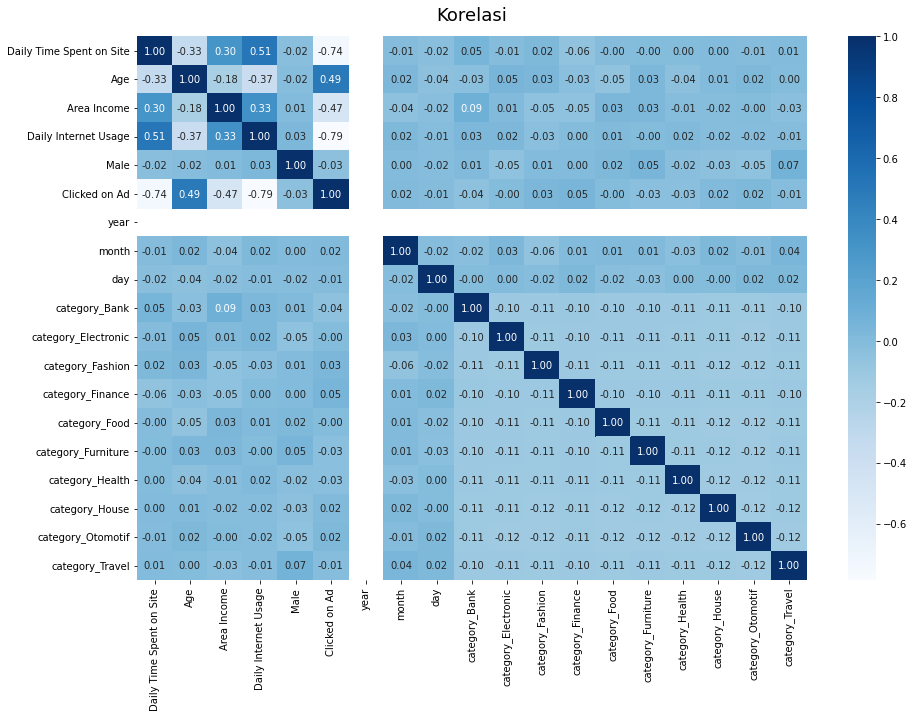

In [ ]:
plt.figure(figsize = (15,10))
heatmaps=sns.heatmap(df_1.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

<b> semua fitur yang sudah diencoding dihapus saja

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   city                      1000 non-null   object 
 7   province                  1000 non-null   object 
 8   year                      1000 non-null   int64  
 9   month                     1000 non-null   int64  
 10  day                       1000 non-null   int64  
 11  category_Bank             1000 non-null   uint8  
 12  category_Electronic       1000 non-null   uint8  
 13  category_Fashion          1000 non-null   uint8  
 14  category_

In [ ]:
# drop_kolom yang sudah diencoding karena memiliki korelasi yang sangat kecil, kecuali `category_Finance. 
df_1= df_1.drop(columns=['category_Bank', 'category_Electronic', 'category_Fashion', 'category_Food', 'category_Furniture', 'category_Health', 
                         'category_House', 'category_Otomotif', 'category_Travel', 'Male'])

Kita cek kembali datanya :

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Clicked on Ad             1000 non-null   int64  
 5   city                      1000 non-null   object 
 6   province                  1000 non-null   object 
 7   year                      1000 non-null   int64  
 8   month                     1000 non-null   int64  
 9   day                       1000 non-null   int64  
 10  category_Finance          1000 non-null   uint8  
dtypes: float64(3), int64(5), object(2), uint8(1)
memory usage: 79.2+ KB


In [ ]:
df_1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,city,province,year,month,day,category_Finance
0,68.95,35,432837300.0,256.09,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,2016,3,27,0
1,80.23,31,479092950.0,193.77,0,Denpasar,Bali,2016,4,4,0
2,69.47,26,418501580.0,236.50,0,Surabaya,Jawa Timur,2016,3,13,0
3,74.15,29,383643260.0,245.89,0,Batam,Kepulauan Riau,2016,1,10,0
4,68.37,35,517229930.0,225.58,0,Medan,Sumatra Utara,2016,6,3,1


## 5. Split Data (Train - Test)

Sebelum dilakukan split Data, terlebih dahulu dibuat binary label untuk target

In [ ]:
# pembuatan binary label target yang imbalance
df_1['Clicked on Ad Class'] = df_1['Clicked on Ad'] > 0.8
df_1['Clicked on Ad Class'].value_counts()

False    500
True     500
Name: Clicked on Ad Class, dtype: int64

Splitting

In [ ]:
df_2 = df_1.copy()

In [ ]:
# pemisahan features vs target
X = df_2[[col for col in df_2.columns if (str(df_2[col].dtype) != 'object') and col not in ['Clicked on Ad', 'Clicked on Ad Class']]]
y = df_2['Clicked on Ad Class'].values
print(X.shape)
print(y.shape)

(1000, 8)
(1000,)


In [ ]:
#Splitting the data into Train & Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

#### Class Imbalance 

In [ ]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X_train, y_train)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    500
True     500
dtype: int64


UNDERSAMPLING
False    346
True     346
dtype: int64


OVERSAMPLING
False    354
True     354
dtype: int64


SMOTE
False    354
True     354
dtype: int64


# TASK 3 - MODELLING

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## 1. EKSPERIMENT 1 - Tanpa Normalisasi ataupun Tanpa Standarisasi

### A. K-nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_over_SMOTE, y_over_SMOTE)

# Prediction & Evaluation
y_pred = knn.predict(X_test)
eval_classification(knn, y_pred, X_over_SMOTE, X_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.71
Recall (Test Set): 0.64
F1-Score (Test Set): 0.67
AUC: 0.68


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[105,  56],
       [ 41,  98]])

Tuning Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fit Model & Evaluasi
model.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.73
Recall (Test Set): 0.62
F1-Score (Test Set): 0.67
AUC: 0.69


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[111,  58],
       [ 35,  96]])

### B. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = DT.predict(X_test)
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.93
Recall (Test Set): 0.94
F1-Score (Test Set): 0.94
AUC: 0.93


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[135,   9],
       [ 11, 145]])

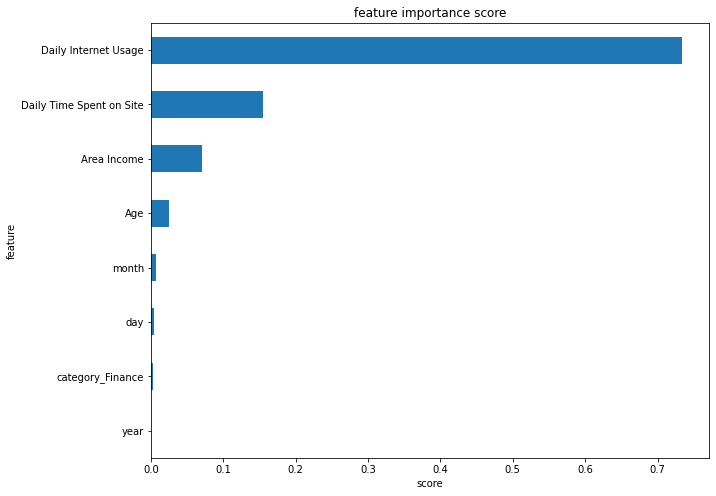

In [ ]:
show_feature_importance(DT)

### C. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95
AUC: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[139,   9],
       [  7, 145]])

#### Tuning Hyperparameter

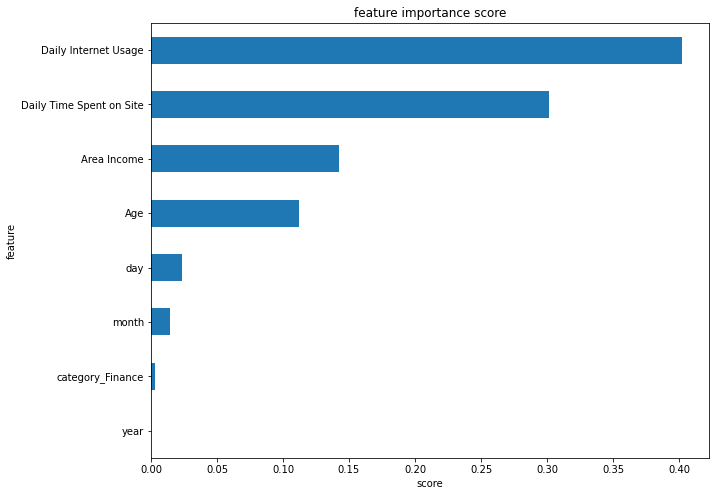

In [ ]:
show_feature_importance(rf)

### D. XGBOOST

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_over_SMOTE, y_over_SMOTE)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95
AUC: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[139,   9],
       [  7, 145]])

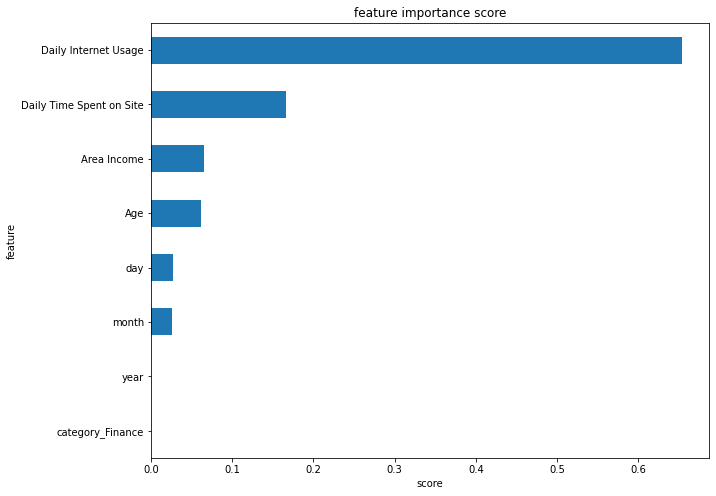

In [ ]:
show_feature_importance(xg)

## 2. EKPERIMENT 2 - Setelah Normalisasi ataupun setelah Standarisasi

In [ ]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,year,month,day,category_Finance
0,68.950000,35,432837300.0,256.09,2016,3,27,0
1,80.230000,31,479092950.0,193.77,2016,4,4,0
2,69.470000,26,418501580.0,236.50,2016,3,13,0
3,74.150000,29,383643260.0,245.89,2016,1,10,0
4,68.370000,35,517229930.0,225.58,2016,6,3,1
...,...,...,...,...,...,...,...,...
995,72.970000,30,499691990.0,208.58,2016,2,11,1
996,51.300000,45,474475190.0,134.42,2016,4,22,0
997,64.929524,51,296910040.0,120.37,2016,2,1,0
998,55.550000,19,293445530.0,187.95,2016,3,24,0


Fitur yang akan dilakukan Fitur transformation adalah `Daily Time Spent On Site`, `Age`, `Area Income`, `Daily Internet Usage`, `year`, `day`, `month`. Feature transformation yang dilakukan adalah <B> STANDARISASI

In [ ]:
X_transform = X.copy()
y_transform = y.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X_transform['Daily Time Spent on Site'] = StandardScaler().fit_transform(X_transform['Daily Time Spent on Site'].values.reshape(len(X), 1))
X_transform['Age'] = StandardScaler().fit_transform(X_transform['Age'].values.reshape(len(X), 1))
X_transform['Area Income'] = StandardScaler().fit_transform(X_transform['Area Income'].values.reshape(len(X), 1))
X_transform['Daily Internet Usage'] = StandardScaler().fit_transform(X_transform['Daily Internet Usage'].values.reshape(len(X), 1))
X_transform['year'] = StandardScaler().fit_transform(X_transform['year'].values.reshape(len(X), 1))
X_transform['month'] = StandardScaler().fit_transform(X_transform['month'].values.reshape(len(X), 1))
X_transform['day'] = StandardScaler().fit_transform(X_transform['day'].values.reshape(len(X), 1))

In [ ]:
X_transform.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,year,month,day,category_Finance
0,0.255538,-0.114905,0.513521,1.748066,0.0,-0.424193,1.319174,0
1,0.972484,-0.570425,1.008662,0.318909,0.0,0.095015,-1.315508,0
2,0.288588,-1.139826,0.360065,1.298817,0.0,-0.424193,-0.284546,0
3,0.586045,-0.798185,-0.013075,1.514154,0.0,-1.462610,-0.628200,0
4,0.218673,-0.114905,1.416897,1.048394,0.0,1.133432,-1.430060,1


Splitting Data Train and Test

In [ ]:
#Splitting the data into Train & Test
from sklearn.model_selection import train_test_split 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_transform,y,test_size = 0.3, random_state = 42)

In [ ]:
from imblearn import under_sampling, over_sampling
X_under2, y_under2 = under_sampling.RandomUnderSampler(1).fit_resample(X_train2, y_train2)
X_over2, y_over2 = over_sampling.RandomOverSampler(1).fit_resample(X_train2, y_train2)
X_over_SMOTE2, y_over_SMOTE2 = over_sampling.SMOTE(1).fit_resample(X_train2, y_train2)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under2).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over2).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE2).value_counts())

Original
False    500
True     500
dtype: int64


UNDERSAMPLING
False    346
True     346
dtype: int64


OVERSAMPLING
False    354
True     354
dtype: int64


SMOTE
False    354
True     354
dtype: int64


### 1. Model K- Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier()
knn2.fit(X_over_SMOTE2, y_over_SMOTE2)

# Prediction & Evaluation
y_pred2 = model.predict(X_test2)
eval_classification(knn, y_pred2, X_over_SMOTE2, X_over_SMOTE2, X_test2, y_test2)

Accuracy (Test Set): 0.51
Precision (Test Set): 0.51
Recall (Test Set): 1.00
F1-Score (Test Set): 0.68
AUC: 0.50


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2, y_test2)

array([[  0,   0],
       [146, 154]])

#### After Tuning Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model2 = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fit Model & Evaluasi
model2.fit(X_over_SMOTE2, y_over_SMOTE2)
y_pred2 = model2.predict(X_test2)
eval_classification(model2, y_pred2, X_over_SMOTE2, y_over_SMOTE2, X_test2, y_test2)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.99
Recall (Test Set): 0.92
F1-Score (Test Set): 0.95
AUC: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2, y_test2)

array([[144,  13],
       [  2, 141]])

### 2. Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT2 = DecisionTreeClassifier(random_state=42)
DT2.fit(X_over_SMOTE2,y_over_SMOTE2)

y_pred2 = DT2.predict(X_test2)
eval_classification(DT2, y_pred2, X_over_SMOTE2, y_over_SMOTE2, X_test2, y_test2)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.93
Recall (Test Set): 0.94
F1-Score (Test Set): 0.94
AUC: 0.93


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2, y_test2)

array([[135,   9],
       [ 11, 145]])

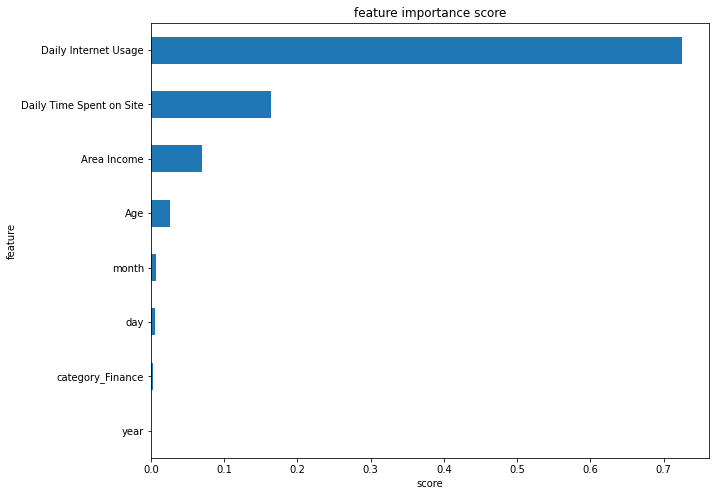

In [ ]:
show_feature_importance(DT2)

### 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_over_SMOTE2,y_over_SMOTE2)

y_pred2 = rf2.predict(X_test2)
eval_classification(rf2, y_pred2, X_over_SMOTE2, y_over_SMOTE2, X_test2, y_test2)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.95
F1-Score (Test Set): 0.95
AUC: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2, y_test2)

array([[139,   7],
       [  7, 147]])

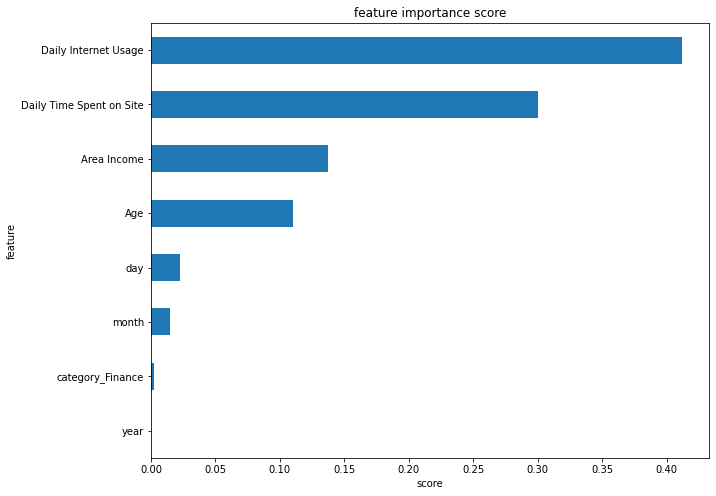

In [ ]:
show_feature_importance(rf2)

### 4. XGBOOST

In [ ]:
from xgboost import XGBClassifier
xg2 = XGBClassifier(random_state=42)
xg2.fit(X_over_SMOTE2, y_over_SMOTE2)

y_pred2 = xg2.predict(X_test2)
eval_classification(xg2, y_pred2, X_over_SMOTE2, y_over_SMOTE2, X_test2, y_test2)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95
AUC: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2, y_test2)

array([[139,   9],
       [  7, 145]])

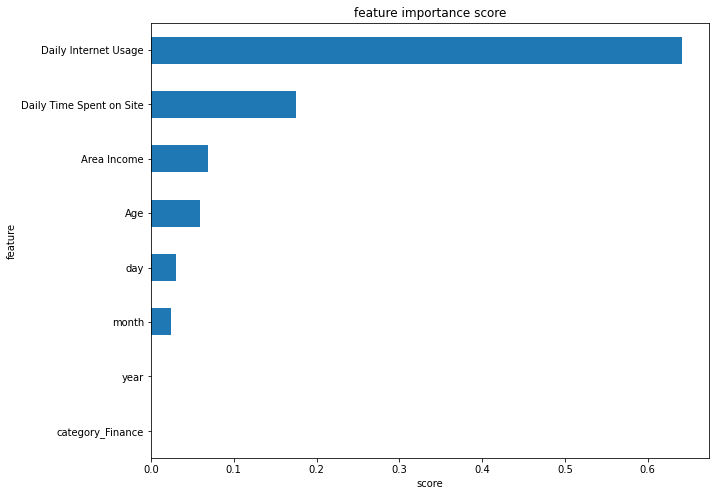

In [ ]:
show_feature_importance(xg2)

### Hasil Interpretasi dari Model :
1. Dalam evaluasi Machine Learning, Metric yang digunakan adalah “Presisi”. Ketika dilakukan penayangan iklan, jumlah tayang berkaitan dengan cost yang akan kita bayarkan ke pihak penyedia layanan. Kita ingin mengoptimasi customer yang akan mengklik iklan kita. Dalam hal ini, pengukuran presisi dimaksudkan untuk menhurangi parameter False Positive atau keadaan ketika kita memprediksi bahwa customer akan mengklik iklan tersebut, akan tetapi ternyata tidak. Kita menginginkan jumlah False Positive ini sekecil mungkin sehingga cost yang kita gunakan untuk tayangan iklan lebih optimal.
2. Berdasarkan hasil eksperimen 1 (Tanpa standarisasi) dengan eksperimen 2 (Setelah standarisasi), hasil evaluasi metric pada algoritma K-Nearest Neighbour sangat berbeda signifikan. Hasil yang lebih baik diperoleh ketika model sudah distandarisasi dan dilakukan tuning hyperparameter (presisi = 0.99). Hal ini disebabkan ketika data tidak distandarisasi, ada nilai yang dominan pada suatu fitur sehinga algoritma tidak dapat memperlakukan fitur lain dalam pemodelan, skala yang berbeda akan mempersulit interpretasi model ML (dalam kasus ini model algoritma KNN). Sedangkan model Random Forest, Decission Tree and XGBOOST tidak memiliki perbedaan yang signifikan dalam skor evaluasinya, akan tetapi hal ini karena data yang dimodelkan masih simpel, kasus yang berbeda akan terjadi jika jumlah data lebih banyak dan fitur yg berkorelasi sedikit dan korelasinya kecil. 
3. Feature Importance : 
- Daily internet usage
- Daily time spent on site
- Area income

# TASK 4 - BUSINESS RECOMMENDATION and SIMULATION

# 1. Rekomendasi Bisnis berdasarkan Feature importance

### a. Hubungan Daily Internet Usage dengan jumlah klik ads

In [ ]:
df_1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,city,province,year,month,day,category_Finance,Clicked on Ad Class
0,68.95,35,432837300.0,256.09,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,2016,3,27,0,False
1,80.23,31,479092950.0,193.77,0,Denpasar,Bali,2016,4,4,0,False
2,69.47,26,418501580.0,236.50,0,Surabaya,Jawa Timur,2016,3,13,0,False
3,74.15,29,383643260.0,245.89,0,Batam,Kepulauan Riau,2016,1,10,0,False
4,68.37,35,517229930.0,225.58,0,Medan,Sumatra Utara,2016,6,3,1,False


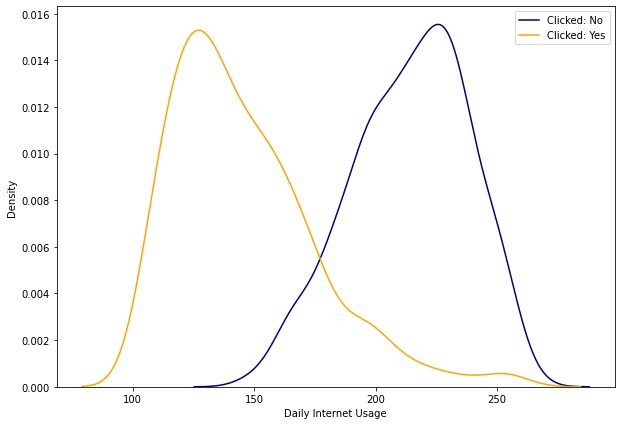

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(df_1[df_1['Clicked on Ad']==0]['Daily Internet Usage'].dropna(),color='navy',label='Clicked: No', ax=ax)
sns.kdeplot(df_1[df_1['Clicked on Ad']==1]['Daily Internet Usage'].dropna(),color='orange',label='Clicked: Yes', ax=ax)
plt.legend() ; 

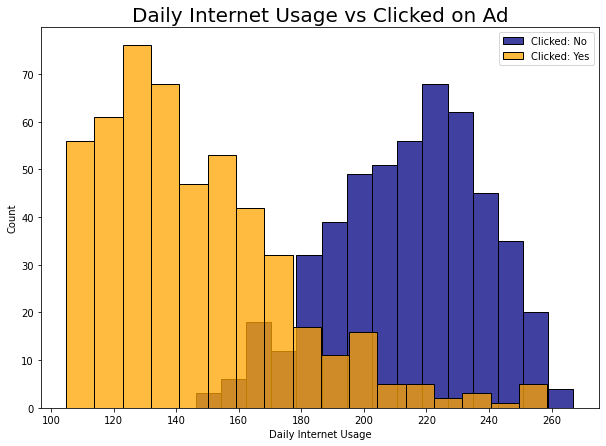

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(df_1[df_1['Clicked on Ad']==0]['Daily Internet Usage'].dropna(),color='navy',label='Clicked: No', ax=ax)
sns.histplot(df_1[df_1['Clicked on Ad']==1]['Daily Internet Usage'].dropna(),color='orange',label='Clicked: Yes', ax=ax)
plt.title('Daily Internet Usage vs Clicked on Ad', size = 20)
plt.legend() ; 

Perilaku Clicked Ad (klik Iklan) cenderung dilakukan oleh customer dengan `Daily internet usage` yang lebih kecil. Jumlah yang meng-klik semakin kecil dan customer yang tidak meng-klik semakin besar seiring dengan besarnya jumlah `Daily Internet Usage`. Dalam hal ini, tim data scientist diharapkan dapat membuat sistem (engine) yang dapat langsung menargetkan customer dengan `Daily Internet Usage` dengan nilai 110-170 minute/day. Dengan demikian, dapat meminimalisir atau menekan biaya pemasangan iklan di platform dan mengoptimasi customer yang kemungkinan besar akan mengklik iklan kita. 

### b.Hubungan Daily time spent on site dengan jumlah Clicked Ads

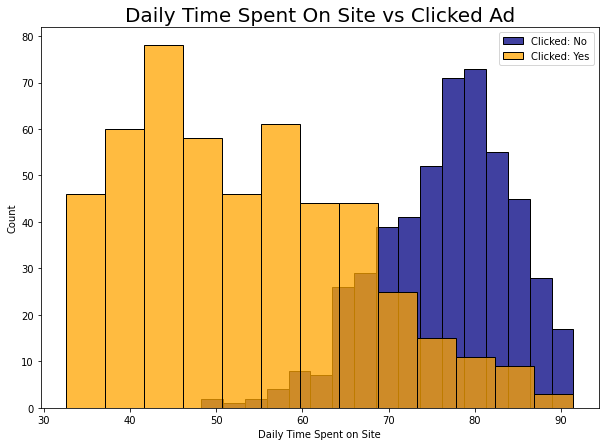

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(df_1[df_1['Clicked on Ad']==0]['Daily Time Spent on Site'].dropna(),color='navy',label='Clicked: No', ax=ax)
sns.histplot(df_1[df_1['Clicked on Ad']==1]['Daily Time Spent on Site'].dropna(),color='orange',label='Clicked: Yes', ax=ax)
plt.title('Daily Time Spent On Site vs Clicked Ad', size  = 20)
plt.legend() ; 

`Daily Time spent` berpengaruh terhadap jumlah customer yang melakukan klik iklan. Semakin besar nilai `Daily time spent on site`, kecendrungan click ad semakin kecil dan sebaliknya, jumlah click ad semakin banyak ketika `Daily Time Spent on site` lebih kecil. Dari distribusi data fitur ini, Tim data scientist merekomendasikan untuk membuat egine atau sistem yang dapat melakukan tracking terhadap customer, berapa lama customer tersebut berselancar pada website tempat iklan berada. kemudian, sesuai data, akan ditayangkan iklan pada customer dengan value `Daily Time On Site` berkisar 35-65 minute in a day. 

### c. Hubungan Area Income dengan Jumlah Click Ads

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


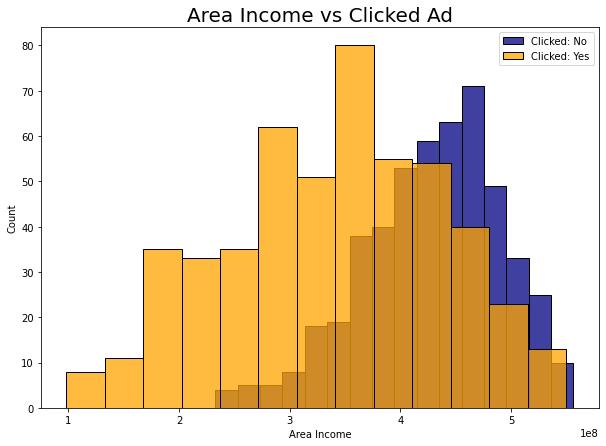

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(df_1[df_1['Clicked on Ad']==0]['Area Income'].dropna(),color='navy',label='Clicked: No', ax=ax)
sns.histplot(df_1[df_1['Clicked on Ad']==1]['Area Income'].dropna(),color='orange',label='Clicked: Yes', ax=ax)
plt.title('Area Income vs Clicked Ad', size  = 20)
plt.legend() ; 

### d. Hubungan Umur dengan Jumlah CLicked Ads

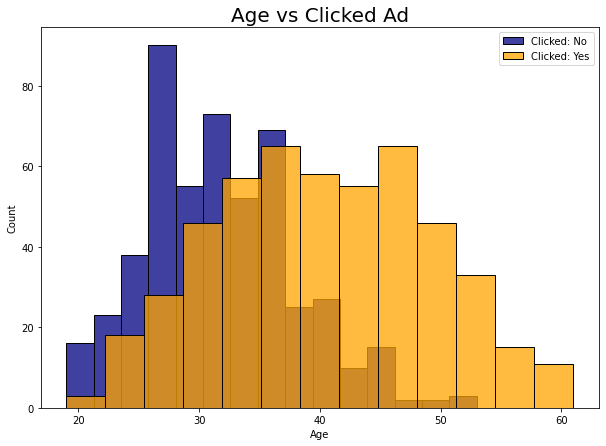

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(df_1[df_1['Clicked on Ad']==0]['Age'].dropna(),color='navy',label='Clicked: No', ax=ax)
sns.histplot(df_1[df_1['Clicked on Ad']==1]['Age'].dropna(),color='orange',label='Clicked: Yes', ax=ax)
plt.title('Age vs Clicked Ad', size  = 20)
plt.legend() ; 

## KESIMPULAN

1. Fitur teratas : 
- Daily internet usage : Click Through rate tinggi ketika Daily internet usage rendah (optimum 110-170 min/day) 
- Daily time spent on site : CTR tinggi ketika Daily time spent on site rendah (optimum 35-65 min in a day) 

Dari kedua fitur tersebut, data scientist akan membangun engine yang dapat melakukan track terhadap dua fitur ini untuk mengautomasi penyangan iklan pada customer yang terindikasi dua data tersebut.

2. Model machine learning yang telah dibangun dalam simulasinya dapat mengurangi operasional cost dalam marketing (metode penayangan iklan) dan meningkatkan Net Profit Margin dari 40% ke 50%.